# Séries Temporais - Introdução

### Importar bibliotecas
* Pandas
* Matplotlib [pylot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
* Matplotlib [dates](https://matplotlib.org/stable/api/dates_api.html)
* [Seaborn](https://seaborn.pydata.org/generated/seaborn.set_style.html)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from random import gauss, randrange, random

# Tratamento de datas
import matplotlib.dates as mdates

# Estilo seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

### Conectar com Google Drive

In [ ]:
# Conectar com o Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Dados de infra estutura computacional

O arquivo **requisicoes_dia.csv** contém dados com os acessos diários à infra estrutura computacional.<br>
* Dados de acesso ao servidor WEB de 01 de janeiro de 2006 até 31 de dexembro de 2016
* Dados de acesso ao servidor de banco de dados de 01 de janeiro de 2010 até 31 de dezembro de 2016
* Dados de acesso ao servidor de aplicação de 01 de janeiro de 2012 até 31 de dezembro de 2016

## Carregar os dados
* Leitura do arquivo *requisicoes_dia.csv*
* Definir coluna 0 como índice<br>


* A primeira coluna do arquivo **requisicoes_dia.csv** contém dados de tempo.
* O argumento **parse_dates=True** converte os strings com datas salvos no arquivo para o tipo **datetime**.
* O índice do dataframe **req_dia** é do tipo **DatetimeIndex**.
* Cada valor no **Datetimeindex** é do tipo **datetime** e os componentes de data e tempo individuais estão disponíveis como atributos (ano, mês, dia. hora, minuto e segundo).

In [ ]:
req_dia = pd.read_csv('/content/servidores_requisicoes_dia.csv',
                      index_col=0, parse_dates=True)
req_dia.head(3)

,WEB,BD,APLIC
Data,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN


### Visualização da série WEB

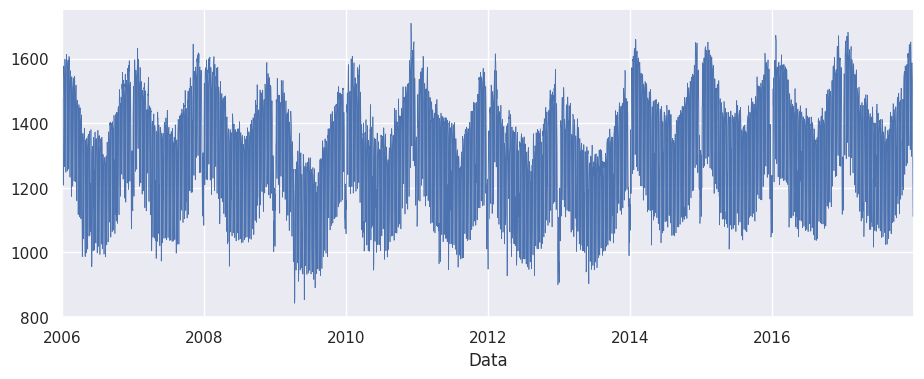

In [ ]:
# Plotar série WEB
req_dia['WEB'].plot(linewidth=0.5);

### Visualização das séries WEB BD APLIC

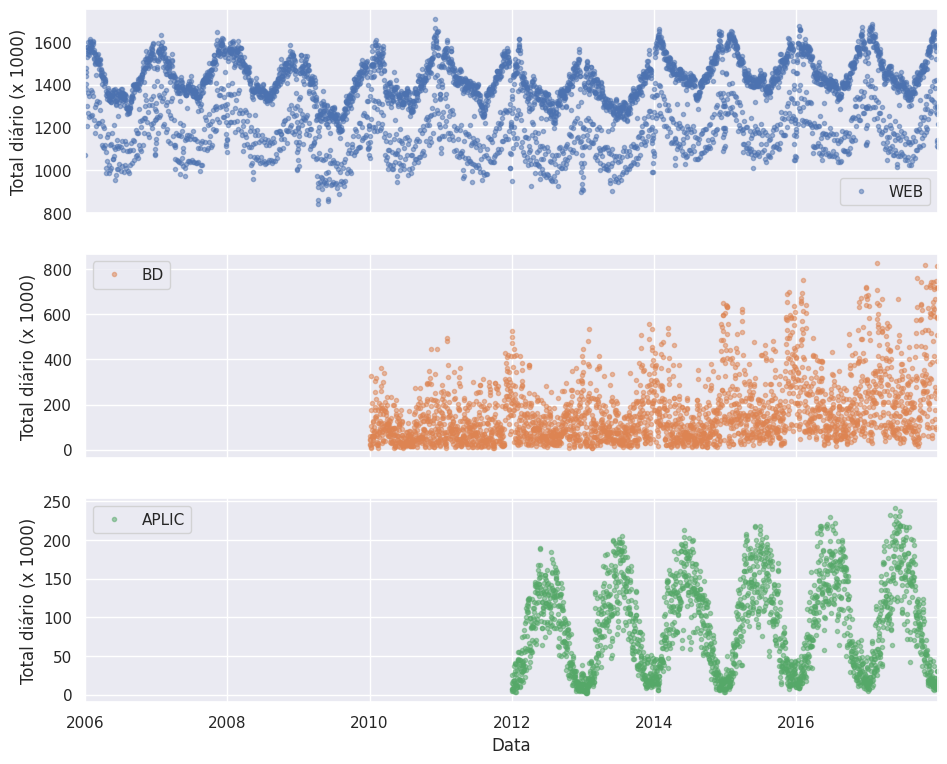

In [ ]:
# Plotar séries WEB BD e APLIC
colunas = ['WEB', 'BD', 'APLIC']
axes = req_dia[colunas].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total diário (x 1000)')

# Redimensionamento

### Redimensionamento semanal com agregação por média
Plotar as séries temporais diárias e semanais do servidor de aplicação em um período de seis meses no mesmo gráfico.
* A agregação por média produz NaN quando algum dado do intervalo de agregação for inexistente

In [ ]:
# Selecionar as colunas
colunas = ['WEB', 'BD', 'APLIC']

# Redimensionar para frequencia semanal agregando com a média
req_media_semanal = req_dia[colunas].resample('W').mean()

### Indexar linhas da série APLIC por range de datas
#### Observações sobre o exemplo
* O valor correspondente à media semanal em 2017-02-26 (53.013143) é o valor da média dos valores nos dias 20, 21, 22, 23, 24, 25 e 26 (31.768, 35.746, 25.278, 50.721, 70.540, 97.579, 59.460)
* Cada linha da série temporal redimensionada é rotulada com o maior valor do intervalo de tempo de cada intervalo de agregação

In [ ]:
# Indexar linhas da série APLIC por range de datas
inicio, fim = '2017-01', '2017-02'
print(req_media_semanal.loc[inicio:fim, 'APLIC']);
print(req_dia.loc['2017-02-20':'2017-02-26', 'APLIC']);

Data
2017-01-01    31.384000
2017-01-08    14.594286
2017-01-15    13.220286
2017-01-22    33.415000
2017-01-29    43.412714
2017-02-05    30.910429
2017-02-12    37.440143
2017-02-19    75.798286
2017-02-26    53.013143
Freq: W-SUN, Name: APLIC, dtype: float64
Data
2017-02-20    31.768
2017-02-21    35.746
2017-02-22    25.278
2017-02-23    50.721
2017-02-24    70.540
2017-02-25    97.579
2017-02-26    59.460
Name: APLIC, dtype: float64


### Plotar dados diários e semanais da série APLIC no mesmo gráfico

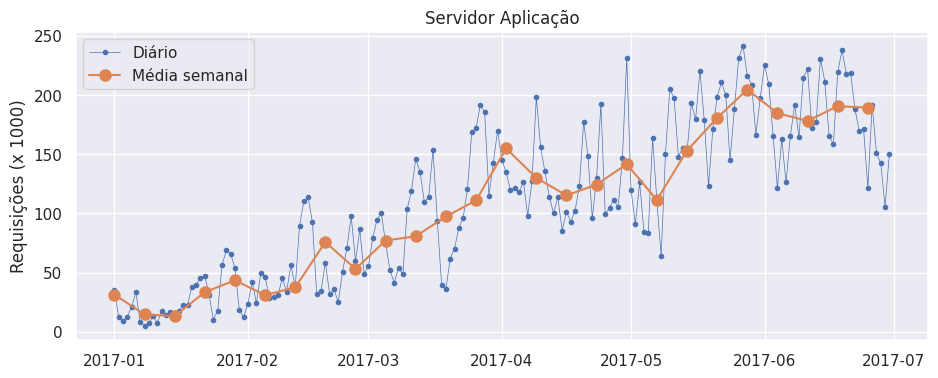

In [ ]:
# Inicio e fim do período
inicio, fim = '2017-01', '2017-06'

# Plotar os dados semanal e diário no mesmo gráfico
fig, ax = plt.subplots()
# Dados diários
ax.plot(req_dia.loc[inicio:fim, 'APLIC'],
marker='.', linestyle='-', linewidth=0.5, label='Diário')
# Dados semanais
ax.plot(req_media_semanal.loc[inicio:fim, 'APLIC'],
marker='o', markersize=8, linestyle='-', label='Média semanal')
# Formatação
ax.set_ylabel('Requisições (x 1000)')
ax.set_title('Servidor Aplicação')
ax.legend();

### Redimensionamento mensal com agregação por soma
A agregação por soma retorna a soma de todos os dados mesmo se houver dados ausentes.<br>
Pode-se usar o parâmetro **min_count** para fazer a soma igual se houver menos do que **min_count** registros em um mês.

#### Plotar dados mensais das séries WEB APLIC e BD
* Série BD plotagem de linha
* Série APLIC e WEB plotagem de área

<ipython-input-8-9031f841e681>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  req_soma_mensal = req_dia[colunas].resample('M').sum(min_count=28)


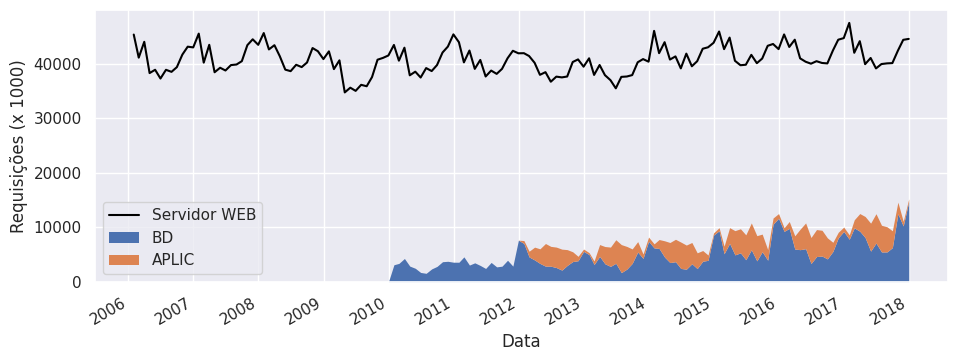

In [ ]:
# Calcula as somas mensais
# Default: coloca a soma em zero para meses com valores faltantes
# min_count: coloca a soma em zero se houver menos do que min_count valores no mês
req_soma_mensal = req_dia[colunas].resample('M').sum(min_count=28)

# Plotar
fig, ax = plt.subplots()
# Plotar série WEB (linha)
ax.plot(req_soma_mensal['WEB'], color='black', label='Servidor WEB')
# Plotar séries APLIC e BD (área)
req_soma_mensal[['BD', 'APLIC']].plot.area(ax=ax, linewidth=0)
# Formatação
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Requisições (x 1000)')
ax.legend();

### Cálcular a média móvel de 7 dias
* O primeiro valor médio não ausente está em 04/01/2006.
* Esta é a posição central do primeiro intervalo móvel.

In [ ]:
# Calcular a média móvel de 7 dias
req_media_movel_7d = req_dia[colunas].rolling(7, center=True).mean()
req_media_movel_7d.head(10)

,WEB,BD,APLIC
Data,,,
2006-01-01,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN
2006-01-05,1381.300143,NaN,NaN
2006-01-06,1402.557571,NaN,NaN
2006-01-07,1421.754429,NaN,NaN
2006-01-08,1438.891429,NaN,NaN
2006-01-09,1449.769857,NaN,NaN


## EXEMPLO 1: Plotar série APLIC (diário e semanal)
Série temporal Servidor de Aplicações (janeiro a junho de 2017)
* Dados diários (variável **req_dia**)
* Dados agregados semanalmente pela média (variável **req_media_semanal**)
* Dados agregados semanalmente pela média móvel de 7 dias (variável **req_media_movel_7d**)

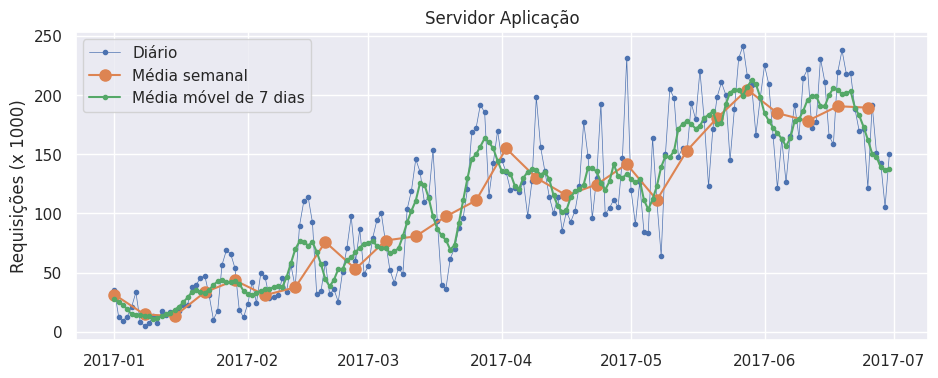

In [ ]:
# Início e fim
start, end = '2017-01', '2017-06'
# Diário, agrupado pela média semanal, média móvel de sete dias
fig, ax = plt.subplots()
# PLotar dados diários
ax.plot(req_dia.loc[start:end, 'APLIC'],
marker='.', linestyle='-', linewidth=0.5, label='Diário')
# Plotar dados semanais agregados pela média
ax.plot(req_media_semanal.loc[start:end, 'APLIC'],
marker='o', markersize=8, linestyle='-', label='Média semanal')
# Plotar dados semanais agregados pela média móvel
ax.plot(req_media_movel_7d.loc[start:end, 'APLIC'],
marker='.', linestyle='-', label='Média móvel de 7 dias')
# Formatação
ax.set_ylabel('Requisições (x 1000)')
ax.set_title('Servidor Aplicação')
ax.legend();

## EXEMPLO 2: Plotar série WEB diário com marcador de dia da semana
### Zoom In (2 meses)
Série temporal servidor WEB (Janeiro e Fevereiro de 2017)
* Dados diários (série req_dia)
* Usar **mdates.WeekdayLocator()** e **mdates.MONDAY** para definir os ticks do eixo x para a primeira segunda-feira de cada semana
* Usar **mdates.DateFormatter()** para melhorar a formatação dos rótulos dos ticks

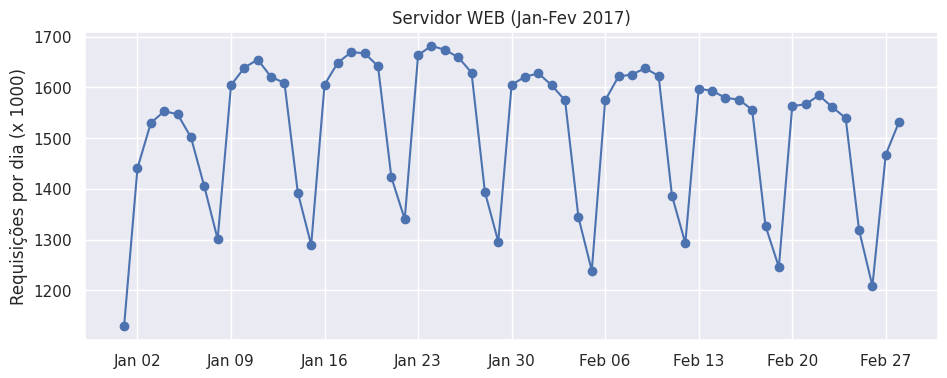

In [ ]:
# Início e fim
start, end = '2017-01', '2017-02'
fig, ax = plt.subplots()
# Plotar dados diários
ax.plot(req_dia.loc[start:end, 'WEB'], marker='o', linestyle='-')
# Formatação
ax.set_ylabel('Requisições por dia (x 1000)')
ax.set_title('Servidor WEB (Jan-Fev 2017)')
# Setar os ticks principais no eixo x para intervalos semanais iniciando nas segundas feiras
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Formatar rótulos dos ticks no eixo x para meses (três letras) e dias (dois dígitos)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Formativa

## Exercício 1 - Plotar série BD (diário e semanal)
Plotar série temporal BD (Janeiro de 2017 a Junho de 2017)
* Dados diários (variável **req_dia**)
* Dados agregados semanalmente pela média (variável **req_media_semanal**)
* Média móvel de 7 dias (variável **req_media_movel_7d**)

Dica: ver EXEMPLO 1

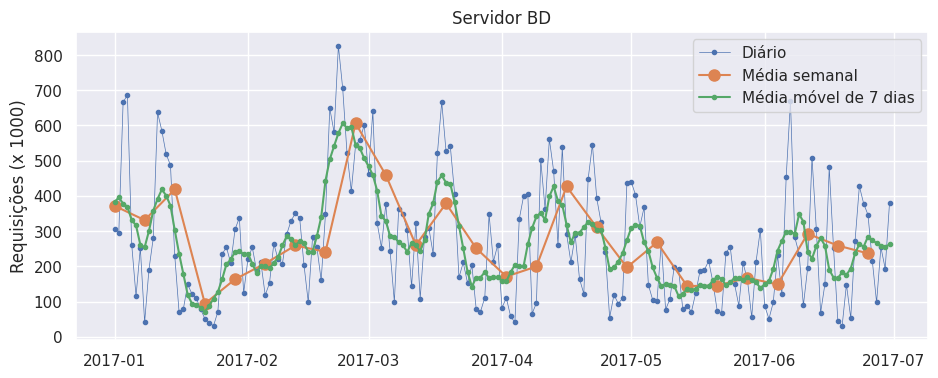

In [ ]:
# Início e fim
start, end = '2017-01', '2017-06'

fig, ax = plt.subplots()

ax.plot(req_dia.loc[start:end, 'BD'],
marker='.', linestyle='-', linewidth=0.5, label='Diário')

ax.plot(req_media_semanal.loc[start:end, 'BD'],
marker='o', markersize=8, linestyle='-', label='Média semanal')

ax.plot(req_media_movel_7d.loc[start:end, 'BD'],
marker='.', linestyle='-', label='Média móvel de 7 dias')

ax.set_ylabel('Requisições (x 1000)')
ax.set_title('Servidor BD')
ax.legend();

## Exercício 2 - Plotar série BD diário com marcador de dia da semana
### Zoom In (2 meses)
Plotar a série temporal BD (Janeiro de 2017 a Fevereiro de 2017)
* Dados diários (variável **req_dia**)
* Usar mdates.WeekdayLocator() e mdates.MONDAY para definir os ticks do eixo x para a primeira segunda-feira de cada semana
* Usar mdates.DateFormatter() para melhorar a formatação dos rótulos dos ticks.

Dica: ver exemplo 2

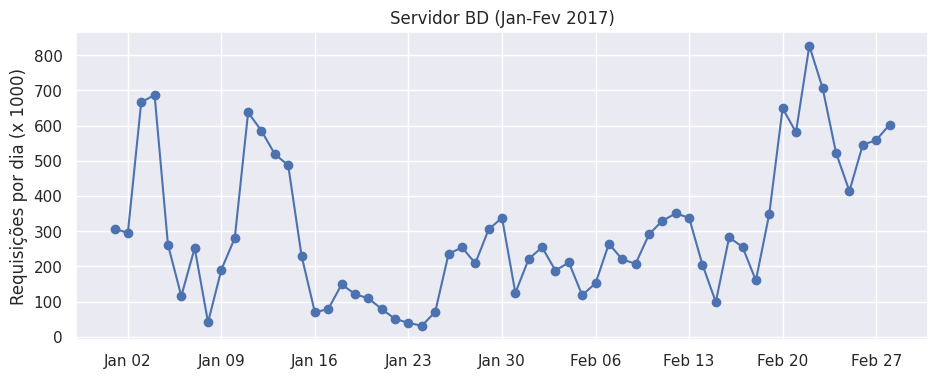

In [ ]:
# Início e fim
start, end = '2017-01', '2017-02'
fig, ax = plt.subplots()

ax.plot(req_dia.loc[start:end, 'BD'], marker='o', linestyle='-')

ax.set_ylabel('Requisições por dia (x 1000)')
ax.set_title('Servidor BD (Jan-Fev 2017)')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Entrega
Imprimir para pdf.<br>
Fazer uplod no AVA.